# 3027. Find the Number of Ways to Place People II

You are given a 2D array points of size n x 2 representing integer coordinates of some points on a 2D-plane, where points[i] = [xi, yi].

We define the right direction as positive x-axis (increasing x-coordinate) and the left direction as negative x-axis (decreasing x-coordinate). Similarly, we define the up direction as positive y-axis (increasing y-coordinate) and the down direction as negative y-axis (decreasing y-coordinate)

You have to place n people, including Alice and Bob, at these points such that there is exactly one person at every point. Alice wants to be alone with Bob, so Alice will build a rectangular fence with Alice's position as the upper left corner and Bob's position as the lower right corner of the fence (Note that the fence might not enclose any area, i.e. it can be a line). If any person other than Alice and Bob is either inside the fence or on the fence, Alice will be sad.

Return the number of pairs of points where you can place Alice and Bob, such that Alice does not become sad on building the fence.

Note that Alice can only build a fence with Alice's position as the upper left corner, and Bob's position as the lower right corner. For example, Alice cannot build either of the fences in the picture below with four corners (1, 1), (1, 3), (3, 1), and (3, 3), because:

With Alice at (3, 3) and Bob at (1, 1), Alice's position is not the upper left corner and Bob's position is not the lower right corner of the fence.
With Alice at (1, 3) and Bob at (1, 1), Bob's position is not the lower right corner of the fence.

 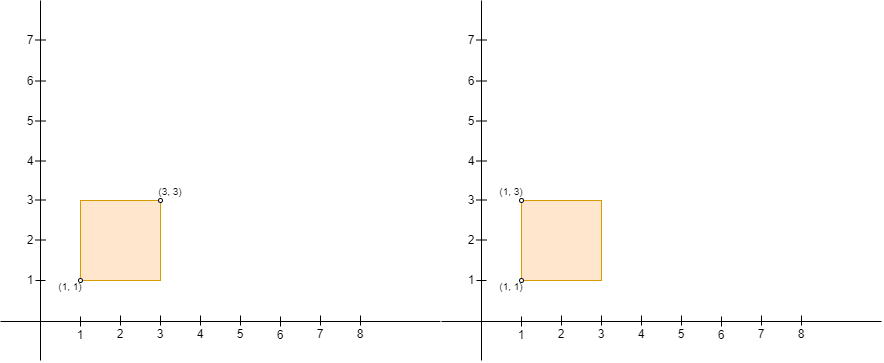

Example 1:

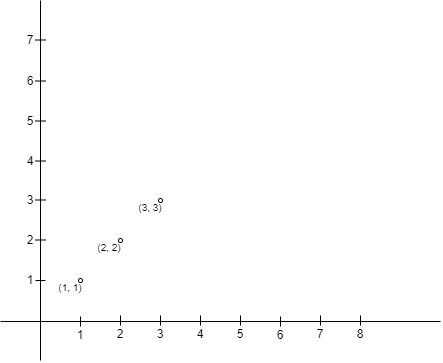


Input: points = [[1,1],[2,2],[3,3]]
Output: 0
Explanation: There is no way to place Alice and Bob such that Alice can build a fence with Alice's position as the upper left corner and Bob's position as the lower right corner. Hence we return 0. 
Example 2:

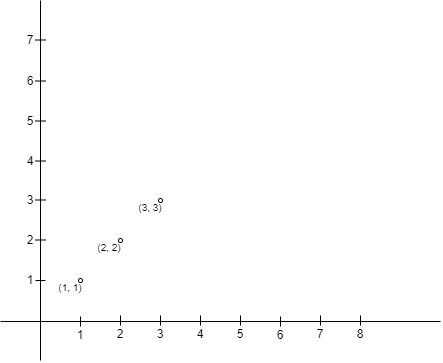

Input: points = [[6,2],[4,4],[2,6]]
Output: 2
Explanation: There are two ways to place Alice and Bob such that Alice will not be sad:
- Place Alice at (4, 4) and Bob at (6, 2).
- Place Alice at (2, 6) and Bob at (4, 4).
You cannot place Alice at (2, 6) and Bob at (6, 2) because the person at (4, 4) will be inside the fence.
Example 3:

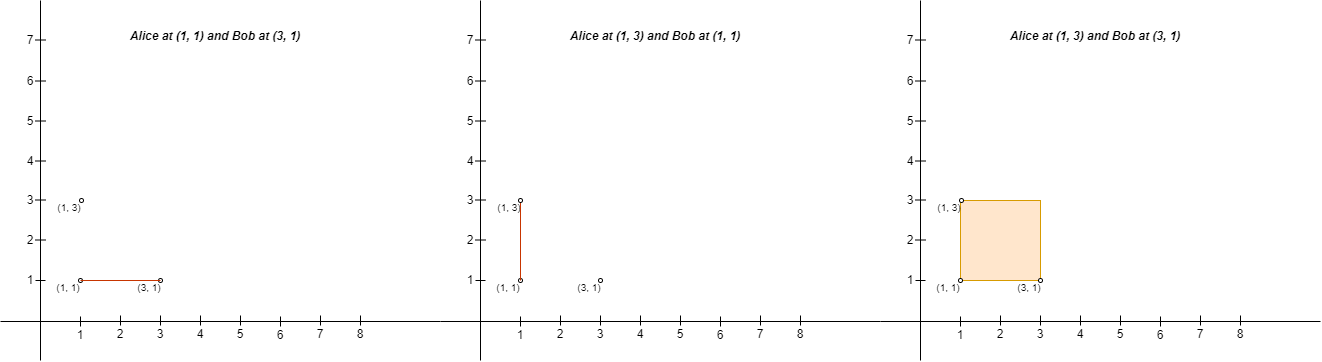

Input: points = [[3,1],[1,3],[1,1]]
Output: 2
Explanation: There are two ways to place Alice and Bob such that Alice will not be sad:
- Place Alice at (1, 1) and Bob at (3, 1).
- Place Alice at (1, 3) and Bob at (1, 1).
You cannot place Alice at (1, 3) and Bob at (3, 1) because the person at (1, 1) will be on the fence.
Note that it does not matter if the fence encloses any area, the first and second fences in the image are valid.
 

Constraints:

2 <= n <= 1000
points[i].length == 2
-109 <= points[i][0], points[i][1] <= 109
All points[i] are distinct.

# Solution:
Sorting and Enumeration

In [45]:
points = [[5,0],[0,1],[0,0],[0,4]]
# Step 1: sort by x ascending, and for ties by y descending
points.sort(key=lambda x: (x[0], -x[1]))

n = len(points)
res = 0

for i in range(n):
    # Take the current "anchor" point (x1, y1)
    x1, y1 = points[i][0], points[i][1]

    # max_y will track the maximum y seen so far to the right of i
    max_y = -float('inf')
    max_y_changed = False  # whether max_y has been updated yet

    # Iterate over all points after i
    for j in range(i+1, n):
        x2, y2 = points[j][0], points[j][1]

        # Only consider if anchor's y >= candidate's y
        if y1 >= y2:

            # Case 1: immediate neighbor (j == i+1)
            if j == i+1:
                res += 1
                print((x1,y1), (x2,y2))

            # Case 2: not the immediate neighbor
            else:
                if max_y_changed:
                    # If we already saw a y, then ensure the sequence
                    # maintains a certain relation: either the maximum
                    # so far is strictly above y1, OR below the candidate y2
                    if (max_y > y1 or max_y < y2):
                        res += 1
                        print((x1,y1), (x2,y2))
                else:
                    # If this is the first update of max_y, accept the pair
                    res += 1
                    print((x1,y1), (x2,y2))

            # Update max_y and mark it as changed
            max_y = max(max_y, y2)
            print(max_y)  # debug: show current max_y
            max_y_changed = True

# Final result stored in res


(0, 4) (0, 1)
1
1
1
(0, 1) (0, 0)
0
0
(0, 0) (5, 0)
0
